<table style="border:none; border-collapse:collapse; cellspacing:0; cellpadding:0">
    <tr>
        <td width=30% style="border:none">
            <img src="logo_datascientest.png" width="100%"/>
        </td>
        <td style="border:none">
            <center>
                <h1>DS project: Customer satisfaction</h1>
                <h2>Modelisation - FastText</h2>
            </center>
        </td>
    </tr>
</table>

<hr>

**Date** : 2023

**Author** : Elie MAZE, Luc Thomas

**Goal** : Train & evaluate models

In [23]:
import _mypath
import os
import pandas as pd
import fasttext
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from threadpoolctl import threadpool_limits

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from visu.visu import plotCMX, plotErrors
from utils.utils import getErrors

In [19]:
DATA_FOLDER = "/data/DATALAB_PAU/20_projects/j0215602/DS_NLP/input/labeled"
_MAX_WORKERS = 12

# 2 classes
## Data loading

In [25]:
outfile_2cls_train = os.path.join(DATA_FOLDER, "train_2classes.csv")
df_train = pd.read_csv(outfile_2cls_train, sep=",", encoding="utf-8", engine="python")

outfile_2cls_val = os.path.join(DATA_FOLDER, "val_2classes.csv")
df_val = pd.read_csv(outfile_2cls_val, sep=",", encoding="utf-8", engine="python")

outfile_2cls_test = os.path.join(DATA_FOLDER, "test_2classes.csv")
df_test = pd.read_csv(outfile_2cls_test, sep=",", encoding="utf-8", engine="python")

print("train set:", df_train.shape)
print("val set:", df_val.shape)
print("test set:", df_test.shape)

train set: (63459, 11)
val set: (15865, 11)
test set: (19832, 11)


## Data prep for FastText

In [29]:
mapping = {1:"__label__NEGATIVE", 2:"__label__NEGATIVE", 
           4:"__label__POSITIVE", 5:"__label__POSITIVE"}

df_train["Sentiment"] = df_train["star"].replace(mapping).astype(str)
df_val["Sentiment"] = df_val["star"].replace(mapping).astype(str)
df_test["Sentiment"] = df_test["star"].replace(mapping).astype(str)

In [30]:
outfile_train = os.path.join(DATA_FOLDER, "fasttext_train.txt")
df_train[["Sentiment", "cleaned_words"]].to_csv(outfile_train, sep=" ", encoding="utf-8")

outfile_val = os.path.join(DATA_FOLDER, "fasttext_val.txt")
df_val[["Sentiment", "cleaned_words"]].to_csv(outfile_val, sep=" ", encoding="utf-8")

outfile_test = os.path.join(DATA_FOLDER, "fasttext_test.txt")
df_test[["Sentiment", "cleaned_words"]].to_csv(outfile_test, sep=" ", encoding="utf-8")

## Training

Progress: 100.0% Trials:   19 Best score:  0.950583 ETA:   0h 0m 0s
Training again with best arguments
Read 1M words
Number of words:  136851
Number of labels: 2
Progress: 100.0% words/sec/thread:  185713 lr:  0.000000 avg.loss:  0.014106 ETA:   0h 0m 0s
/data/DATALAB_PAU/20_projects/j0215602/DS_NLP/jupyter/../lib/visu/visu.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+labels)
/data/DATALAB_PAU/20_projects/j0215602/DS_NLP/jupyter/../lib/visu/visu.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""]+labels)


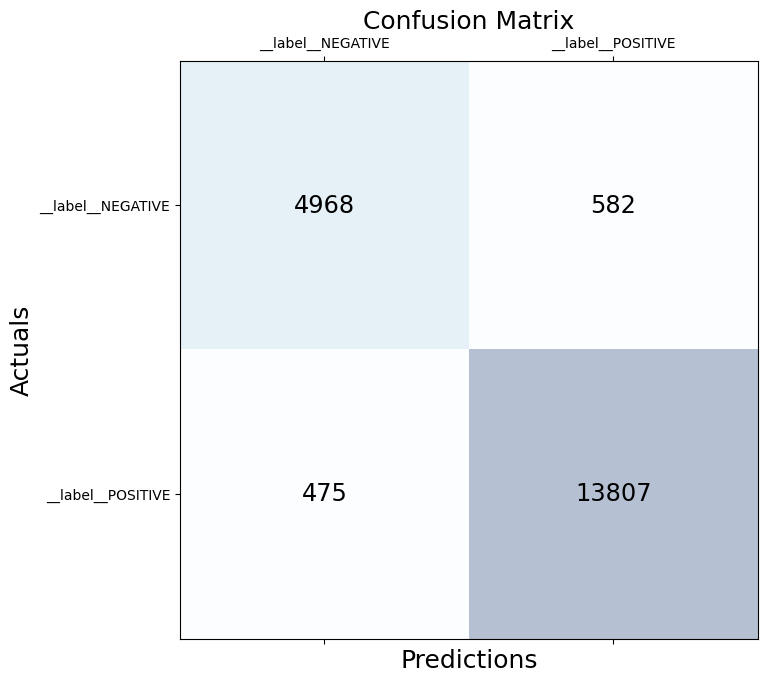

In [31]:
LABELS = ['__label__NEGATIVE', '__label__POSITIVE']

model = None
with threadpool_limits(limits=_MAX_WORKERS):
    model = fasttext.train_supervised(
        input=outfile_train,
        verbose=True,
        autotuneValidationFile=outfile_val)

y_test = df_test["Sentiment"].tolist()

y_pred = []
for i, text in enumerate(df_test["cleaned_words"]):
    y_pred += [model.predict(text)[0][0]]

cm = confusion_matrix(y_test, y_pred)
plotCMX(LABELS, cm)

In [32]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

__label__NEGATIVE       0.91      0.90      0.90      5550
__label__POSITIVE       0.96      0.97      0.96     14282

         accuracy                           0.95     19832
        macro avg       0.94      0.93      0.93     19832
     weighted avg       0.95      0.95      0.95     19832



In [33]:
errors = getErrors(df_test, y_test, y_pred, col_x="star", col_input="cleaned_words")
errors

,errors,total,error_rate
star,,,
1,345,4819,0.071592
2,237,731,0.324213
4,260,3725,0.069799
5,215,10557,0.020366


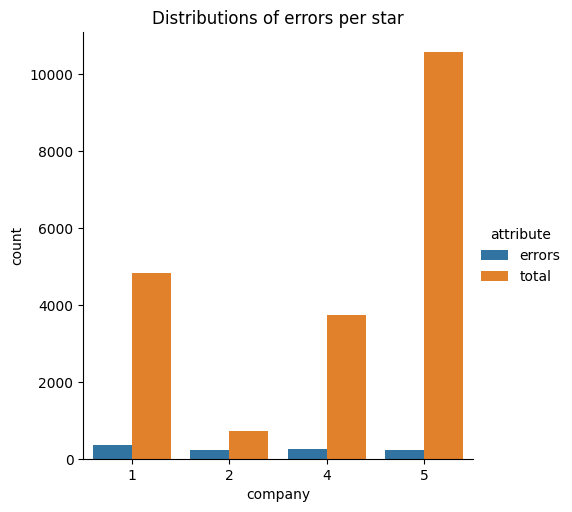

In [34]:
plotErrors(errors, col_x="star")

# 3 Classes

## Data loading

In [35]:
outfile_train = os.path.join(DATA_FOLDER, "train_3classes.csv")
df_train = pd.read_csv(outfile_train, sep=",", encoding="utf-8", engine="python")

outfile_val = os.path.join(DATA_FOLDER, "val_3classes.csv")
df_val = pd.read_csv(outfile_val, sep=",", encoding="utf-8", engine="python")

outfile_test = os.path.join(DATA_FOLDER, "test_3classes.csv")
df_test = pd.read_csv(outfile_test, sep=",", encoding="utf-8", engine="python")

print("train set:", df_train.shape)
print("val set:", df_val.shape)
print("test set:", df_test.shape)

train set: (67526, 11)
val set: (16882, 11)
test set: (21103, 11)


## Data prep for FastText

In [36]:
mapping = {1:"__label__NEGATIVE", 2:"__label__NEGATIVE", 
           3:"__label__NEUTRAL", 
           4:"__label__POSITIVE", 5:"__label__POSITIVE"}

df_train["Sentiment"] = df_train["star"].replace(mapping).astype(str)
df_val["Sentiment"] = df_val["star"].replace(mapping).astype(str)
df_test["Sentiment"] = df_test["star"].replace(mapping).astype(str)

In [37]:
outfile_train = os.path.join(DATA_FOLDER, "fasttext_3cls_train.txt")
df_train[["Sentiment", "cleaned_words"]].to_csv(outfile_train, sep=" ", encoding="utf-8")

outfile_val = os.path.join(DATA_FOLDER, "fasttext_3cls_val.txt")
df_val[["Sentiment", "cleaned_words"]].to_csv(outfile_val, sep=" ", encoding="utf-8")

outfile_test = os.path.join(DATA_FOLDER, "fasttext_3cls_test.txt")
df_test[["Sentiment", "cleaned_words"]].to_csv(outfile_test, sep=" ", encoding="utf-8")

## Training & eval

Progress: 100.0% Trials:   18 Best score:  0.891956 ETA:   0h 0m 0s
Training again with best arguments
Read 1M words
Number of words:  144475
Number of labels: 3
Progress: 100.0% words/sec/thread:  155213 lr:  0.000000 avg.loss:  0.020016 ETA:   0h 0m 0s
/data/DATALAB_PAU/20_projects/j0215602/DS_NLP/jupyter/../lib/visu/visu.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+labels)
/data/DATALAB_PAU/20_projects/j0215602/DS_NLP/jupyter/../lib/visu/visu.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""]+labels)


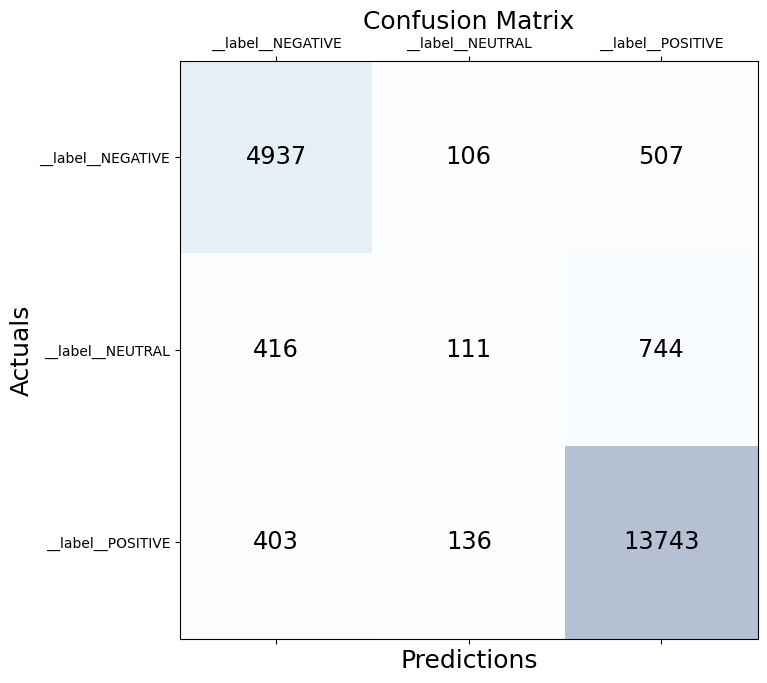

In [38]:
LABELS = ['__label__NEGATIVE', '__label__NEUTRAL', '__label__POSITIVE']

model = None
with threadpool_limits(limits=_MAX_WORKERS):
    model = fasttext.train_supervised(
        input=outfile_train,
        verbose=True,
        autotuneValidationFile=outfile_val)

y_test = df_test["Sentiment"].tolist()

y_pred = []
for i, text in enumerate(df_test["cleaned_words"]):
    y_pred += [model.predict(text)[0][0]]

cm = confusion_matrix(y_test, y_pred)
plotCMX(LABELS, cm)

In [39]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

__label__NEGATIVE       0.86      0.89      0.87      5550
 __label__NEUTRAL       0.31      0.09      0.14      1271
__label__POSITIVE       0.92      0.96      0.94     14282

         accuracy                           0.89     21103
        macro avg       0.70      0.65      0.65     21103
     weighted avg       0.86      0.89      0.87     21103



In [40]:
errors = getErrors(df_test, y_test, y_pred, col_x="star", col_input="cleaned_words")
errors

,errors,total,error_rate
star,,,
1,356,4784,0.074415
2,257,766,0.335509
3,1160,1271,0.912667
4,318,3695,0.086062
5,221,10587,0.020875


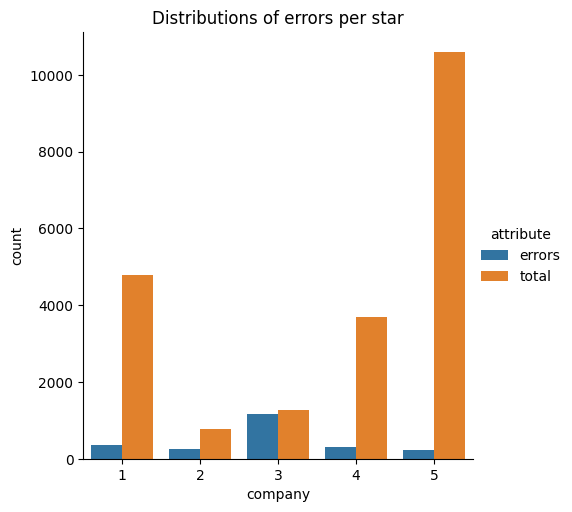

In [41]:
plotErrors(errors, col_x="star")

# 5 classes

## Data loading

In [42]:
outfile_train = os.path.join(DATA_FOLDER, "train_5classes.csv")
df_train = pd.read_csv(outfile_train, sep=",", encoding="utf-8", engine="python")

outfile_val = os.path.join(DATA_FOLDER, "val_5classes.csv")
df_val = pd.read_csv(outfile_val, sep=",", encoding="utf-8", engine="python")

outfile_test = os.path.join(DATA_FOLDER, "test_5classes.csv")
df_test = pd.read_csv(outfile_test, sep=",", encoding="utf-8", engine="python")

print("train set:", df_train.shape)
print("val set:", df_val.shape)
print("test set:", df_test.shape)

train set: (67525, 11)
val set: (16882, 11)
test set: (21104, 11)


## Data prep for FastText

In [43]:
mapping = {1:"__label__VERY_NEGATIVE", 
           2:"__label__NEGATIVE", 
           3:"__label__NEUTRAL", 
           4:"__label__POSITIVE", 
           5:"__label__VERY_POSITIVE"}

df_train["star_label"] = df_train["star"].replace(mapping).astype(str)
df_val["star_label"] = df_val["star"].replace(mapping).astype(str)
df_test["star_label"] = df_test["star"].replace(mapping).astype(str)

In [44]:
outfile_train = os.path.join(DATA_FOLDER, "fasttext_train.txt")
df_train[["star_label", "cleaned_words"]].to_csv(outfile_train, sep=" ", encoding="utf-8")

outfile_val = os.path.join(DATA_FOLDER, "fasttext_val.txt")
df_val[["star_label", "cleaned_words"]].to_csv(outfile_val, sep=" ", encoding="utf-8")

outfile_test = os.path.join(DATA_FOLDER, "fasttext_test.txt")
df_test[["star_label", "cleaned_words"]].to_csv(outfile_test, sep=" ", encoding="utf-8")

## Training & eval

In [45]:
model = None
with threadpool_limits(limits=_MAX_WORKERS):
    model = fasttext.train_supervised(
        input=outfile_train,
        verbose=True,
        autotuneValidationFile=outfile_val)

Progress: 100.0% Trials:   31 Best score:  0.712060 ETA:   0h 0m 0s
Training again with best arguments
Read 1M words
Number of words:  144299
Number of labels: 5
Progress: 100.0% words/sec/thread:  182787 lr:  0.000000 avg.loss:  0.143544 ETA:   0h 0m 0s


/data/DATALAB_PAU/20_projects/j0215602/DS_NLP/jupyter/../lib/visu/visu.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+labels)
/data/DATALAB_PAU/20_projects/j0215602/DS_NLP/jupyter/../lib/visu/visu.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""]+labels)


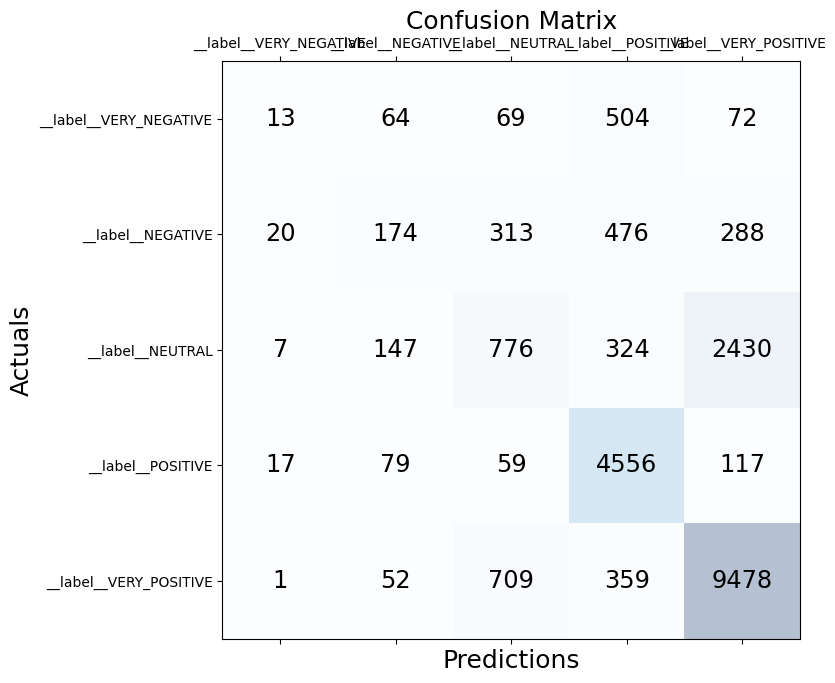

In [46]:
LABELS = list(mapping.values())

mask = ~(df_test["cleaned_words"].isna())
y_test = df_test["star_label"].tolist()

y_pred = []
for i, text in enumerate(df_test["cleaned_words"]):
    y_pred += [model.predict(text)[0][0]]

cm = confusion_matrix(y_test, y_pred)
plotCMX(LABELS, cm)

In [47]:
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

     __label__NEGATIVE       0.22      0.02      0.03       722
      __label__NEUTRAL       0.34      0.14      0.19      1271
     __label__POSITIVE       0.40      0.21      0.28      3684
__label__VERY_NEGATIVE       0.73      0.94      0.82      4828
__label__VERY_POSITIVE       0.77      0.89      0.82     10599

              accuracy                           0.71     21104
             macro avg       0.49      0.44      0.43     21104
          weighted avg       0.65      0.71      0.66     21104



In [48]:
errors = getErrors(df_test, y_test, y_pred, col_x="star", col_input="cleaned_words")
errors

,errors,total,error_rate
star,,,
1,272,4828,0.056338
2,709,722,0.981994
3,1097,1271,0.863100
4,2908,3684,0.789359
5,1121,10599,0.105765


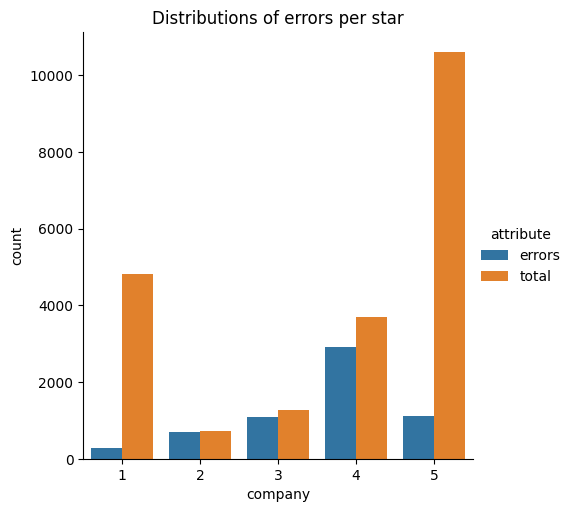

In [49]:
plotErrors(errors, col_x="star")